In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv('C:/Users/user/Desktop/강의/ML/geyser.csv')
dataset

,x,y,class
0,1,4.4,N
1,1,3.9,N
2,1,4.0,P
3,1,4.0,N
4,1,3.5,N
5,1,4.1,N
6,1,2.3,P
7,1,4.7,N
8,1,1.7,P
9,1,4.9,N


In [4]:
dataset.loc[dataset['class'] == "P", "class"] = 1
dataset.loc[dataset['class'] == "N", "class"] = -1

X = dataset[['x','y']].values
y = dataset['class'].values

In [5]:
#spliting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#linear regression
from sklearn.linear_model import LinearRegression
line = LinearRegression()
line.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
#Cast linear regression predictions backward to labels.
y_pred = line.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,1,0.094910
1,1,-0.818277
2,-1,-0.904364
3,-1,-0.348816
4,-1,-0.970521


In [7]:
#print classification report
import sklearn.metrics as metrics
print(metrics.classification_report(y_test,y_pred.round()))
print(metrics.confusion_matrix(y_test,y_pred.round()))

print(metrics.f1_score(y_test, y_pred.round(), average = 'weighted'))

              precision    recall  f1-score   support

        -1.0       0.86      0.73      0.79        26
         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.63      0.77        19

    accuracy                           0.69        45
   macro avg       0.62      0.45      0.52        45
weighted avg       0.92      0.69      0.78        45

[[19  7  0]
 [ 0  0  0]
 [ 3  4 12]]
0.7842891278375148


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [71]:
import statsmodels.api as sm

print(line.intercept_)
print(line.coef_)

c = line.intercept_
m = line.coef_
print('y= {m}*x+{c}'.format(m=m,c=c))

2.311580764570221
[ 0.00664368 -0.72800406]
y= [ 0.00664368 -0.72800406]*x+2.311580764570221


Text(0, 0.5, 'y')

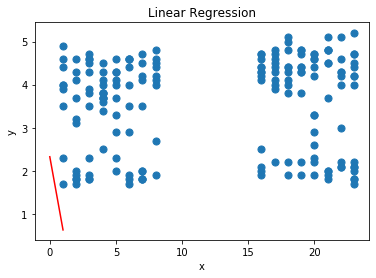

In [80]:

plt.scatter(X_train[:, 0], X_train[:, 1], c=None, s=50, cmap=plt.cm.Paired)

y= m*x+c
plt.plot(y, color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('x') 
plt.ylabel('y')

In [17]:
#convert labels to numbers
dataset_c = pd.read_csv('C:/Users/user/Desktop/강의/ML/chips.csv')
dataset_c.loc[dataset_c['class'] == "P", "class"] = 1
dataset_c.loc[dataset_c['class'] == "N", "class"] = -1
X_c = dataset_c[['x','y']]
y_c = dataset_c['class']

X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_c, y_c, test_size=0.2, random_state=0)

In [6]:
#rbf kernel
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

rbf_svc = SVC(kernel='rbf')

#find best parameters
C_range = 10. ** np.arange(-3, 8)
gamma_range = 10. ** np.arange(-5, 4)

param_grid = dict(gamma=gamma_range, C=C_range)

grid = GridSearchCV(rbf_svc, param_grid=param_grid)
grid.fit(X_train, y_train)

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.903954802259887
{'C': 100.0, 'gamma': 0.01}
SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [19]:
#edit rbf_sve according to best parameters
rbf_svc = SVC(kernel='rbf', C=100, gamma = 0.01)
rbf_svc.fit(X_train, y_train)
y_pred_rbf = rbf_svc.predict(X_test)

In [1]:
# fit the model, don't regularize for illustration purposes
#plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1])
yy = np.linspace(ylim[0], ylim[1])
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = rbf_svc.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(rbf_svc.support_vectors_[:, 0], rbf_svc.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
poly_svc = SVC(kernel='poly')

#find best parameters

C_range = 10. ** np.arange(-3, 8)
gamma_range = 10. ** np.arange(-5, 4)
degree = list(range(0,5))
#coef0 = np.arange(0, 1, 0.1)
param_grid = dict(gamma=gamma_range, C=C_range, degree=degree)
#param_grid = dict(gamma=gamma_range, C=C_range, degree=degree, coef0=coef0)

grid = GridSearchCV(poly_svc, param_grid=param_grid)
grid.fit(X_c_train, y_c_train)

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

In [21]:
#edit poly_sve according to best parameters
poly_svc = SVC(kernel='poly', C=0.01, gamma = 10, degree=2)
poly_svc.fit(X_c_train, y_c_train)
y_pred_poly = poly_svc.predict(X_c_test)

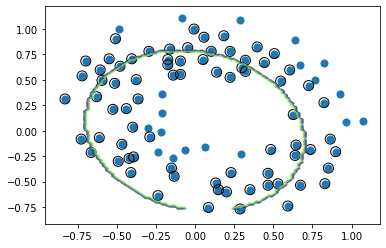

In [22]:
# fit the model, don't regularize for illustration purposes
#plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.scatter(X_c_train.iloc[:, 0], X_c_train.iloc[:, 1], s=50)

h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X_c_train.iloc[:, 0].min(), X_c_train.iloc[:, 0].max()
y_min, y_max = X_c_train.iloc[:, 1].min(), X_c_train.iloc[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = poly_svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, alpha=0.5,
           linestyles=['--', '-', '--'])

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.scatter(poly_svc.support_vectors_[:, 0], poly_svc.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')


In [23]:
#Compare the SVM results (by F1 score) with the Linear Regression.
#Linear Regression results
print(metrics.classification_report(y_test,y_pred.round()))
print(metrics.f1_score(y_test, y_pred.round(), average = 'weighted'))

              precision    recall  f1-score   support

        -1.0       0.86      0.73      0.79        26
         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.63      0.77        19

    accuracy                           0.69        45
   macro avg       0.62      0.45      0.52        45
weighted avg       0.92      0.69      0.78        45

0.7842891278375148


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [24]:
#SVM results
print(metrics.classification_report(y_test,y_pred_rbf.round()))
print(metrics.f1_score(y_test, y_pred_rbf.round(), average = 'weighted'))

              precision    recall  f1-score   support

          -1       0.84      1.00      0.91        26
           1       1.00      0.74      0.85        19

    accuracy                           0.89        45
   macro avg       0.92      0.87      0.88        45
weighted avg       0.91      0.89      0.89        45

0.8853446748183589
